**Find PI to the Nth Digit**

In [3]:
## https://en.wikipedia.org/wiki/Chudnovsky_algorithm
from decimal import *
import math

def factorial(n: int)->int:
    if n==0:
        return 1
    return n*factorial(n-1)

def getRowSum(k: int)->float:
    row_sum = 0
    k = k+1
    getcontext().prec = k
    for k in range(k):
        nominator = factorial(6*k)*(13591409+545140134*k)
        denominator = factorial(3*k)*(factorial(k))**3*(640320**(3*k))
        row_sum+=nominator/denominator 
    return Decimal(row_sum) 
    
def getPi(k: int)->float:
    iter = getRowSum(k)
    
    up = 426880*math.sqrt(10005)
    pi = Decimal(up)/iter 
    
    return pi


    

In [4]:
def gen_pi(l):
    q, r, t, k, m, x, n = 1, 0, 1, 1, 3, 3, 0
    while n<l:
        
        if 4 * q + r - t < m * t:
            n+=1
            yield m
            q, r, t, k, m, x = \
                10*q, 10*(r-m*t), t, k, (10*(3*q+r))//t - 10*m, x
        else:
            q, r, t, k, m, x = \
                q*k, (2*q+r)*x, t*x, k+1, (q*(7*k+2)+r*x)//(t*x), x+2
        
            
            


In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt

angle_value_map = {
    0: 90,
    1: 60,
    2: 30,
    3: 0,
    4: 330,
    5: 300,
    6: 270,
    7: 240,
    8: 210,
    9: 150
}

def get_point(point, angle, length):
    x, y = point
    endy = y + length * math.sin(math.radians(angle))
    endx = length * math.cos(math.radians(angle))
    return (endx, endy)

In [6]:
def gen_walk_from_raw(seq, angle=None, step=0.9):
    def angle2dir(angle):
        return (math.cos(angle), -math.sin(angle))
    x, y, lookat = 0.0, 0.0, 0.0
    yield (x, y)
    for l in seq:
        px, py = angle2dir(lookat)
        lookat += math.radians(angle_value_map[l])
        x, y = x + l * step * math.cos(lookat), y + l * step * (-math.sin(lookat))
        yield (x, y)

In [7]:
from colorsys import hls_to_rgb
def rgb_to_hex(arg):
    r,g,b = arg
    return '%02x%02x%02x' % (int(r*255), int(g*255), int(b*255))

def rainbow_color_stops(n=10, end=1):
    return [ rgb_to_hex(hls_to_rgb(end * i/(n-1), 0.5, 1)) for i in range(n) ]

/var/folders/9f/3mpzdr114t96rqcz9w_80b3w0000gn/T/ipykernel_24609/422592089.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


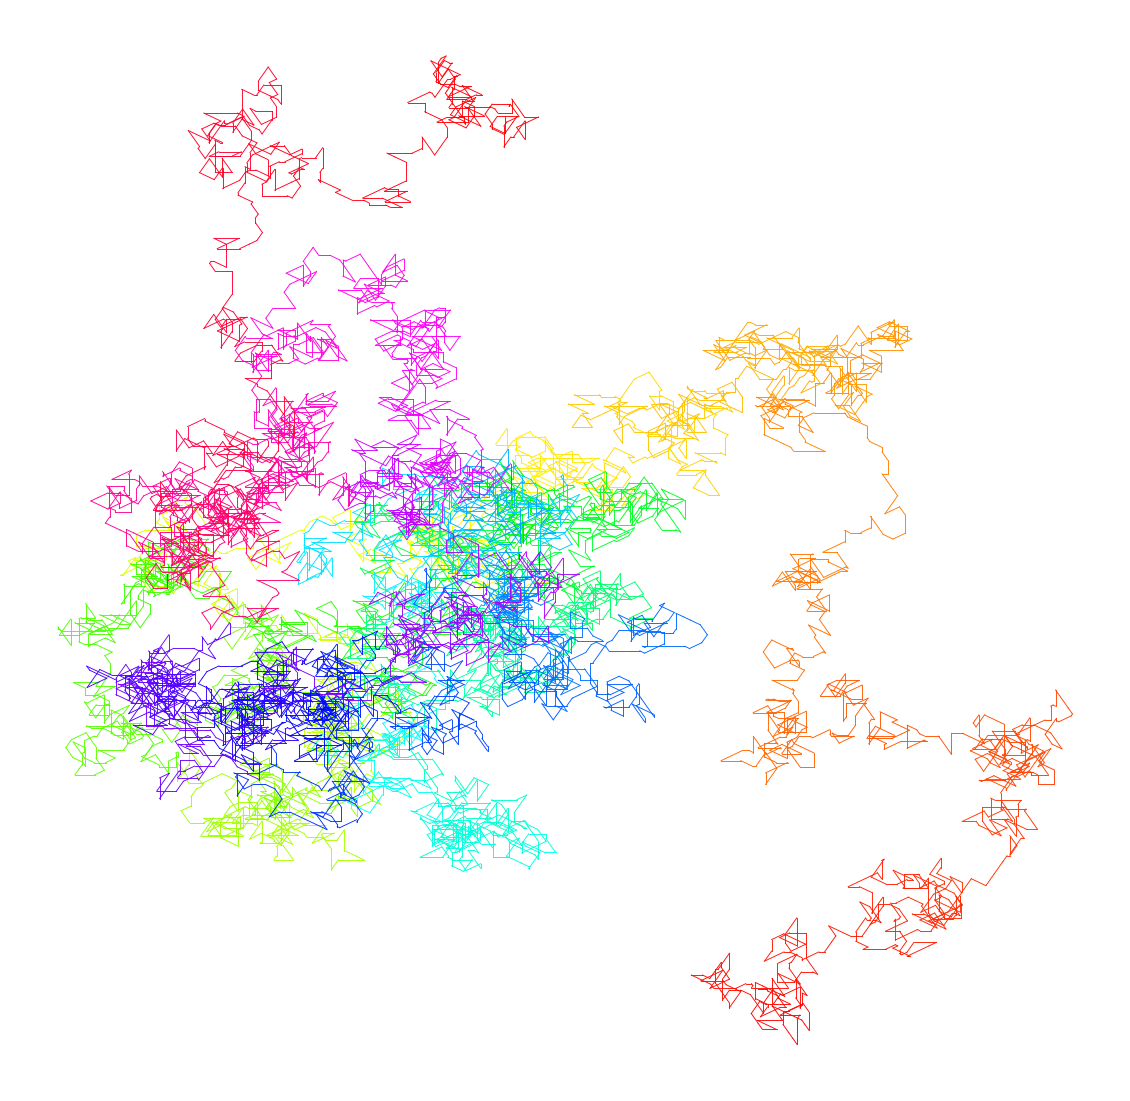

In [8]:
import random
def plot_point():
    fig = plt.figure(figsize=(20, 20))
    fig.patch.set_facecolor('white')
    last_point = (0,0)
    line_length = 5
    ax = plt.subplot(111)
    count = 10000
    colors = rainbow_color_stops(count)
    
    for i, v in enumerate(gen_walk_from_raw(gen_pi(count))):
        new_point=v
        ax.plot([last_point[0], new_point[0]], [last_point[1], new_point[1]], "#"+colors[i-1],  linewidth = 0.9, )
        last_point = v

    
    plt.axis('off')
    fig.show()

plot_point()